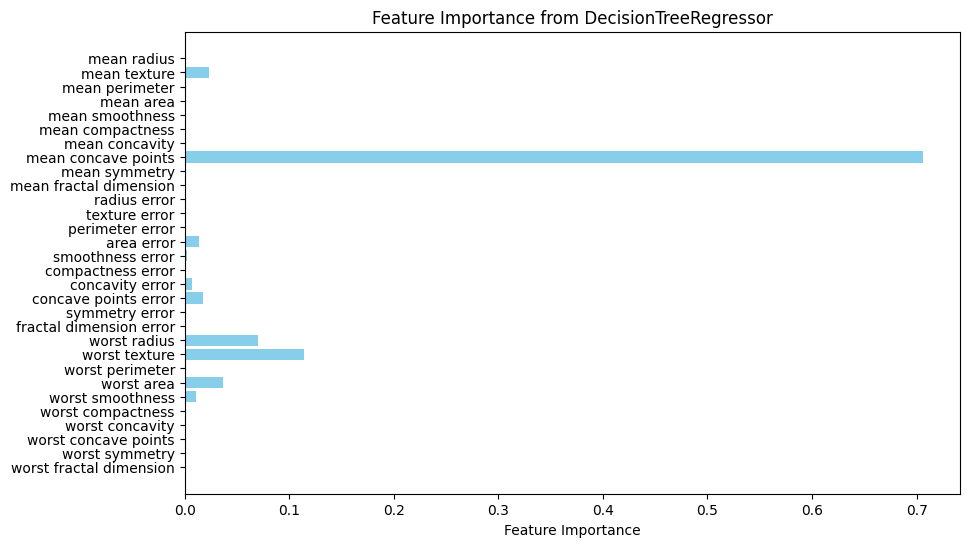

Mean Squared Error (after feature selection): 0.05847953216374269
R-squared (after feature selection): 0.7486772486772486


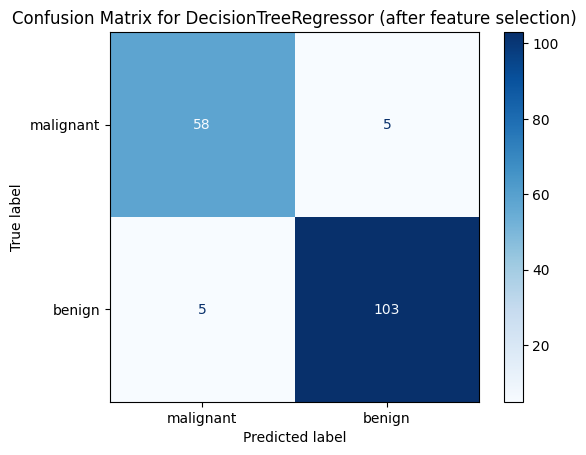

Precision (after feature selection): 0.9537037037037037
Recall (after feature selection): 0.9537037037037037
F1-Score (after feature selection): 0.9537037037037037
Selected features: ['mean concave points' 'worst radius' 'worst texture' 'worst area']
Accuracy (after feature selection): 0.9415204678362573


In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (malignant=0, benign=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the DecisionTreeRegressor model
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train_scaled, y_train)

# Feature Importance from the trained DecisionTreeRegressor model
feature_importance = regressor.feature_importances_

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(data.feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance from DecisionTreeRegressor")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Select the important features using SelectFromModel
selector = SelectFromModel(regressor, threshold="mean", max_features=None)  # You can adjust threshold and max_features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Create and train a new model using the selected features
regressor_selected = DecisionTreeRegressor(random_state=42)
regressor_selected.fit(X_train_selected, y_train)

# Predict on the test set using the selected features
y_pred = regressor_selected.predict(X_test_selected)

# Since we have a binary classification problem, we can round predictions to 0 or 1
y_pred_rounded = np.round(y_pred)

# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred_rounded)
r2 = r2_score(y_test, y_pred_rounded)

# Print performance metrics
print("Mean Squared Error (after feature selection):", mse)
print("R-squared (after feature selection):", r2)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rounded)

# Display the Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for DecisionTreeRegressor (after feature selection)")
plt.show()

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred_rounded)
recall = recall_score(y_test, y_pred_rounded)
f1 = f1_score(y_test, y_pred_rounded)

# Print classification metrics
print("Precision (after feature selection):", precision)
print("Recall (after feature selection):", recall)
print("F1-Score (after feature selection):", f1)

# Display the selected features
selected_features = data.feature_names[selector.get_support()]
print("Selected features:", selected_features)

# Accuracy
accuracy = np.mean(y_test == y_pred_rounded)
print("Accuracy (after feature selection):", accuracy)

Selected features using RFE: ['mean concave points' 'area error' 'worst radius' 'worst texture'
 'worst area' 'worst smoothness' 'worst fractal dimension']
Mean Squared Error (after RFE): 0.05263157894736842
R-squared (after RFE): 0.7738095238095238


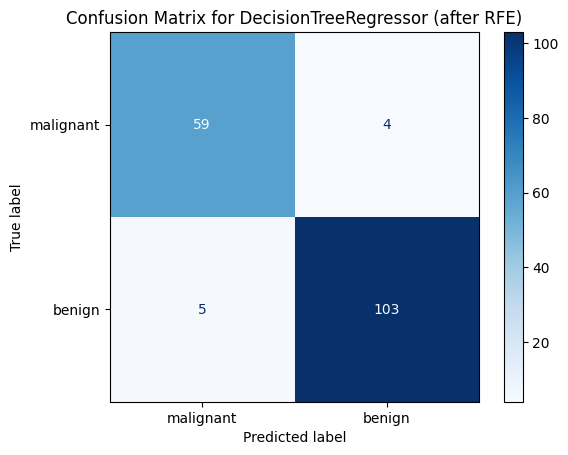

Accuracy (after RFE): 0.9473684210526315


In [11]:
# feature selection using REF
from sklearn.feature_selection import RFE

# Create the RFE model and select 10 attributes
rfe = RFE(estimator=regressor, n_features_to_select=7)
rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features_rfe = data.feature_names[rfe.support_]
print("Selected features using RFE:", selected_features_rfe)

# Transform the data
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# Train a new model using the selected features
regressor_rfe = DecisionTreeRegressor(random_state=42)
regressor_rfe.fit(X_train_rfe, y_train)

# Predict on the test set using the selected features
y_pred_rfe = regressor_rfe.predict(X_test_rfe)

# Since we have a binary classification problem, we can round predictions to 0 or 1
y_pred_rounded_rfe = np.round(y_pred_rfe)

# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse_rfe = mean_squared_error(y_test, y_pred_rounded_rfe)
r2_rfe = r2_score(y_test, y_pred_rounded_rfe)

# Print performance metrics
print("Mean Squared Error (after RFE):", mse_rfe)
print("R-squared (after RFE):", r2_rfe)

# Confusion Matrix
cm_rfe = confusion_matrix(y_test, y_pred_rounded_rfe)

# Display the Confusion Matrix using ConfusionMatrixDisplay
disp_rfe = ConfusionMatrixDisplay(confusion_matrix=cm_rfe, display_labels=data.target_names)
disp_rfe.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for DecisionTreeRegressor (after RFE)")
plt.show()

# Accuracy
accuracy_rfe = np.mean(y_test == y_pred_rounded_rfe)
print("Accuracy (after RFE):", accuracy_rfe)


In [12]:
# Using 5 fold cross validation
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross validation
scores = cross_val_score(regressor, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold
for i, score in enumerate(scores):
    print(f"Fold {i + 1}: {score}")

# Print the mean accuracy and standard deviation
print(f"Mean Accuracy: {scores.mean()}")
print(f"Standard Deviation: {scores.std()}")

# Perform 5-fold cross validation with feature selection
scores_selected = cross_val_score(regressor_selected, X_train_selected, y_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold
for i, score in enumerate(scores_selected):
    print(f"Fold {i + 1}: {score}")

# Print the mean accuracy and standard deviation
print(f"Mean Accuracy (after feature selection): {scores_selected.mean()}")
print(f"Standard Deviation (after feature selection): {scores_selected.std()}")

Fold 1: 0.9125
Fold 2: 0.8625
Fold 3: 0.875
Fold 4: 0.9620253164556962
Fold 5: 0.8734177215189873
Mean Accuracy: 0.8970886075949368
Standard Deviation: 0.03660294081625154
Fold 1: 0.95
Fold 2: 0.8875
Fold 3: 0.9375
Fold 4: 0.9240506329113924
Fold 5: 0.9493670886075949
Mean Accuracy (after feature selection): 0.9296835443037974
Standard Deviation (after feature selection): 0.02311916247986135
